## Connected Component Analysis:

In this part of the tutorial, we will learn about detecting and counting objects of interest in an image. We use Connected Component Analysis to detect connected regions in a binary image. This algorithm initializes a first component with the first pixel and looks at the adjacent pixels to see if they have the same value. If they have, then they are considered as part of that component as well. Given a thresholded binary image, the Connected Component Analysis produces a new image with an assigned value for each object detected. We employ **skimage.measure.label()** function to apply Connected Component Analysis on an image.

Let's load an image of ladybugs. We will have skimage count how many ladybugs there are and color code them.

In [1]:
#Load necessary libraries:
import skimage.io
import skimage.color
import skimage.filters
import numpy as np
import skimage.measure
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

(-0.5, 282.5, 177.5, -0.5)

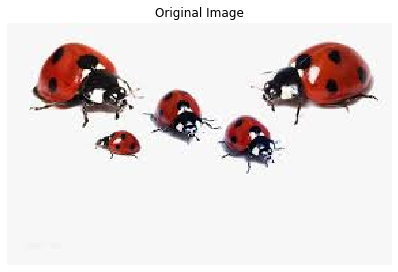

In [2]:
#Load and display the image
ladybugs = skimage.io.imread('ladybugs.jpg')
skimage.io.imshow(ladybugs)
plt.title('Original Image')
plt.axis('off')

First, we need to turn the image into grayscale, denoise it and apply a threshold so we can obtain a binary mask.

(-0.5, 282.5, 177.5, -0.5)

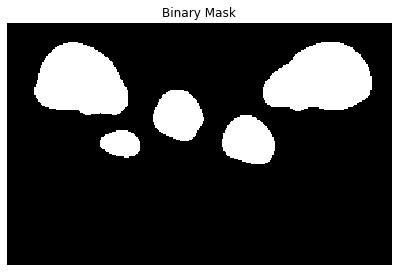

In [3]:
#Turn the image to grayscale
gray_lady = skimage.color.rgb2gray(ladybugs)
#Denoise the image
blurred_lady = skimage.filters.gaussian(gray_lady, sigma=4)
#Apply a threshold of 0.7 to the image
threshold=0.7
binary_mask = blurred_lady < threshold
#Create an all zero values array with the same shape as our binary mask
image = np.zeros(shape=binary_mask.shape)
#Apply mask to the array. Only detected objects will be shown as white (value of 1), 
#the rest will be set to black (value of 0)
image[binary_mask]=1
skimage.io.imshow(image)
plt.title('Binary Mask')
plt.axis('off')

Now that we have the binary mask, we can use skimage.measure.label() function to create a new image where a certain value is assigned to each detected object. Also, it returns the number of objects in the image.  

A certain value is assigned to each ladybug, that's why they all have different colors:


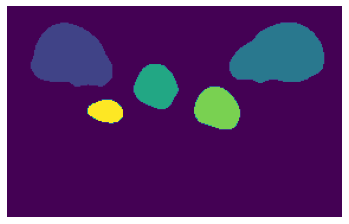

In [4]:
#'labeled_image' is the image with detected objects  
#'count' is the number of objects
labeled_image, count = skimage.measure.label(binary_mask, return_num=True)
print('A certain value is assigned to each ladybug, that\'s why they all have different colors:')
plt.imshow(labeled_image)
plt.axis('off')
plt.show()

The function also returns the numbers of objects in the image:

In [5]:
print('There are {} ladybugs in the image.'.format(count))

There are 5 ladybugs in the image.


We can also color detected objects. **skimage.color.label2rgb()** function colors the objects according to a list of colors that can be customized.

(-0.5, 282.5, 177.5, -0.5)

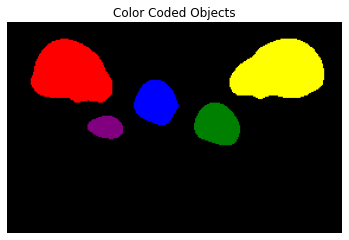

In [6]:
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0, colors=('red','yellow','blue','green','purple'))
plt.imshow(colored_label_image)
plt.title('Color Coded Objects')
plt.axis('off')

## Exercise: Counting Objects and Removing the Ones with Smaller Areas  
In this exercise, we will count the objects in an image and remove objects whose areas are smaller than a certain value.

First, let's create a function to streamline above process. The following function takes in an image file, turns it into grayscale and applies a Gaussian filter and a threshold. Then finds the number of objects in the image. 

In [7]:
def find_count_objects(image_file, sigma=1.0, threshold=0.7, connectivity=1):
    '''
    
        This function takes in an image, turns it into grayscale,
        applies a denoising filter with a sigma value of 1 and threshold
        it to create a binary mask. It then labels and counts the objects 
        in that mask and plots original, labeled and color coded objects.
        The function returns labeled image and the number of the objects.
    
    '''
    image = skimage.io.imread(image_file)
    gray_image = skimage.color.rgb2gray(image)
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    binary_mask = blurred_image < threshold
    labeled_image, count = skimage.measure.label(binary_mask, connectivity=connectivity, return_num=True)
    colored_labeled_image = skimage.color.label2rgb(labeled_image, bg_label=0)
    fig, ax = plt.subplots(1,3, figsize=(18,10), sharex=True, sharey=True)
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[1].imshow(labeled_image)
    ax[1].set_title('Image with Labeled Objects')
    ax[2].imshow(colored_labeled_image)
    ax[2].set_title('Image with Color-Coded Objects')
    for a in ax:
        a.axis('off')
    if count == 1:
        print("{} object detected in the image.".format(count))
    elif count > 1:
        print("{} objects detected in the image.".format(count))
    else:
        print("No objects were detected. Please try again.")
    return labeled_image, count

Let's see how our function will work out given an image file ("ts_os.jpg"):

12 objects detected in the image.


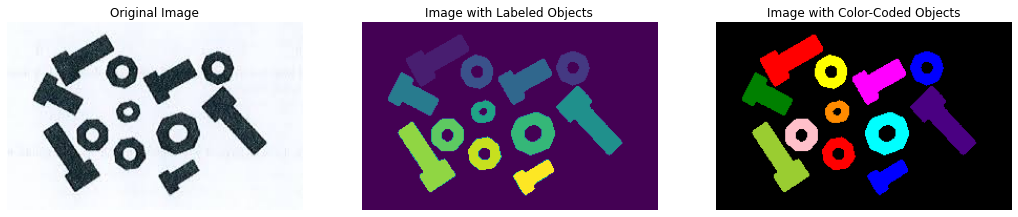

In [8]:
labeled_image, count = find_count_objects("ts_os.jpg")

Now that we know the number of objects in the image, we will find out the size (area) of each object by making use of the **skimage.measure.regionprops()** function. It returns a lot of useful data about the objects but we will focus on the area feature.
The following code prints out the areas of each object in the "T's and O's" image above.

In [9]:
#Find the areas of the objects
objects = skimage.measure.regionprops(labeled_image)
object_areas = [obj["area"] for obj in objects]
print('The areas of the 12 objects are: ')
object_areas

The areas of the 12 objects are: 


[1306, 674, 674, 1071, 980, 1517, 357, 1091, 679, 1440, 656, 623]

Let's draw a histogram of the areas of the objects to visualize:

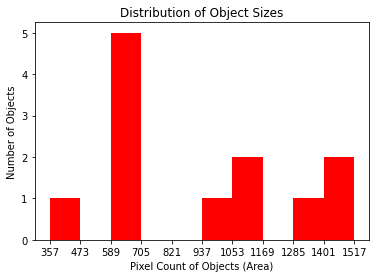

In [10]:
#Draw a histogram of the areas of the objects
hist, bin_edges,_=plt.hist(object_areas, color='red')
plt.title("Distribution of Object Sizes")
plt.xlabel("Pixel Count of Objects (Area)")
plt.ylabel("Number of Objects")
plt.xticks(bin_edges[0:])
plt.show()

We have 12 objects in various sizes in the image. Let's say we would like to inspect the objects whose areas are greater than 900 pixels: 

In [11]:
#There are 6 objects whose areas are greater than 900.
higher_900 = [i for i in object_areas if i> 900]
higher_900

[1306, 1071, 980, 1517, 1091, 1440]

Let's print out the bigger objects (with areas greater than 900) along with their centroids.

Coordinates of the object number 1 is [35.11 70.15]


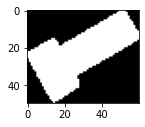

Coordinates of the object number 2 is [ 55.12 154.06]


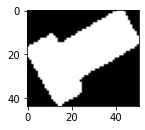

Coordinates of the object number 3 is [69.58 47.49]


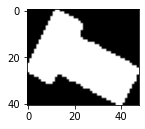

Coordinates of the object number 4 is [ 92.56 215.44]


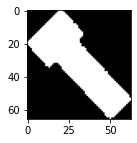

Coordinates of the object number 5 is [105.68 162.57]


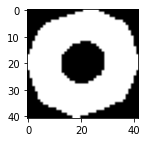

Coordinates of the object number 6 is [129.68  60.67]


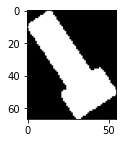

In [12]:
#Save objects whose areas are bigger than 900  
big_objects = [obj for obj in objects if obj['area']>900]
for i in range(len(big_objects)):
    #for each object, print out its centroid and print the object itself
    print("Coordinates of the object number {} is {}".format(i+1, np.round(big_objects[i]['centroid'],2)))
    mask = np.zeros(shape=big_objects[i]['image'].shape)
    mask[big_objects[i]['image']]=1
    plt.figure(figsize=(2,2))
    plt.imshow(mask, cmap=plt.cm.gray)
    plt.show()


Showing individual objects does not help us much. Let's identify them on the original image.

Let's draw red rectangles around the objects whose areas are bigger than 900 pixels to identify them. 

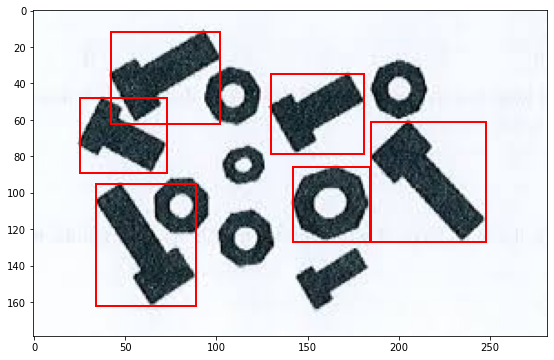

In [13]:
#Read the original image
ts_os = skimage.io.imread('ts_os.jpg')

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(big_objects)):
    #Get the coordinates of the big objects:
    minr, minc, maxr, maxc = big_objects[i].bbox
    #Apply a red rectangle enclosing each object of interest
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, 
                           fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
plt.imshow(ts_os)

Let's go one step further and remove the objects whose areas are smaller than 900 pixels. 
We can achieve this by applying masks to the smaller objects. The mask color would have to be very close to the background color.
To have an idea about the color value of the background, let's draw a histogram of the image:

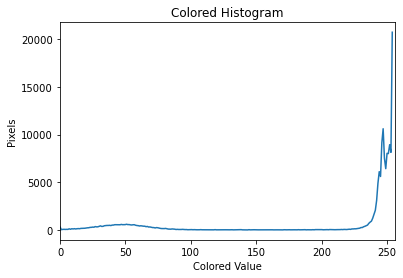

In [14]:
#To get the background pixels color value, let's draw the histogram:
histogram_colored, bin_edges_colored = np.histogram(ts_os, bins=256, range=(0,255))
plt.title('Colored Histogram')
plt.xlabel('Colored Value')
plt.ylabel('Pixels')
plt.xlim([0.0, 256.0])
plt.plot(bin_edges_colored[0:-1], histogram_colored)
plt.show()

It seems like we have a peak around the color value of 247, which is most likely the background color since the background color dominates the image.
Now, let's find the smaller objects and apply the masks with the color value of 247.

(-0.5, 281.5, 178.5, -0.5)

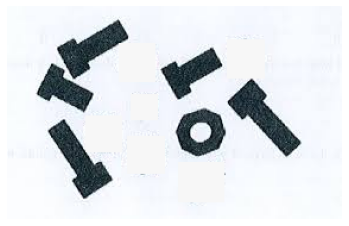

In [15]:
#Get the smaller objects:
small_objects =[obj for obj in objects if obj.area<900]
#Get each object's coordinates (bbox returns a rectangle that encloses the object),
#then assign the color value of 247 for masking.
for i in small_objects:
    ts_os[i.bbox[0]:i.bbox[2], i.bbox[1]:i.bbox[3]]=247
    
plt.imshow(ts_os)
plt.axis('off')

Finally, by covering up the smaller objects, we successfully show only objects whose areas are greater than 900 pixels.